In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
!pip install minisom 
from minisom import MiniSom
import seaborn as sns

In [40]:
#download the wine.csv from the email and run this tab and the next tab OR run(by uncommenting) the next to next tab to run it automatically 
df = pd.read_csv('wine.csv')
df

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [41]:
y=df['Wine'].values
df.drop(['Wine'], 1, inplace=True)
X=np.array(df)
print(X.shape)

(178, 13)


In [33]:
#from sklearn.datasets import load_wine
#df = load_wine()
#X=df.data
#y=df.target

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X)
newX=scaler.transform(X)

In [43]:
y[y==1]=0
y[y==2]=1
y[y==3]=2


In [11]:
#som = MiniSom(12, 12, input_len= 14)

In [44]:
som = MiniSom(14, 14, 13, sigma=1.5, learning_rate=.7, activation_distance='euclidean',
              topology='hexagonal', neighborhood_function='gaussian', random_seed=10)



In [45]:
som.train_batch(newX, 1000, verbose=True)

 [  341 / 1000 ]  34% - 0:00:00 left 

 [  651 / 1000 ]  65% - 0:00:00 left 

 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 1.3885785313546974


In [46]:
from matplotlib.patches import RegularPolygon, Ellipse
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import cm, colorbar
from matplotlib.lines import Line2D

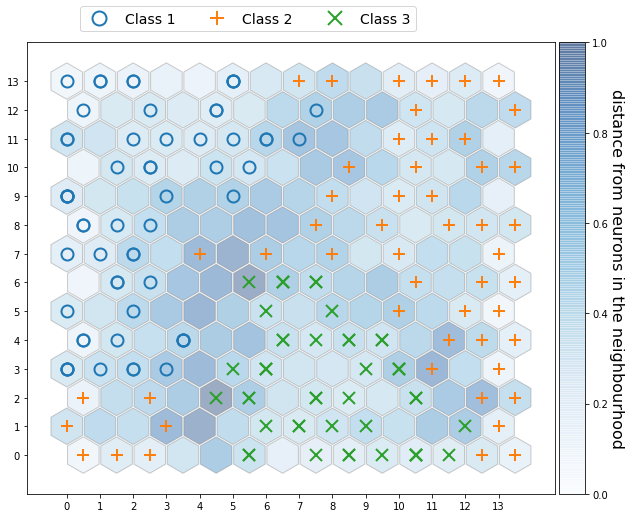

In [47]:

f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)

ax.set_aspect('equal')

xx, yy = som.get_euclidean_coordinates()
umatrix = som.distance_map()
weights = som.get_weights()

for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        
        wy = yy[(i, j)]*2/np.sqrt(3)*3/4
        
        hex = RegularPolygon((xx[(i, j)], wy), numVertices=6, radius=.95/np.sqrt(3),
                      facecolor=cm.Blues(umatrix[i, j]), alpha=.4, edgecolor='gray')
        ax.add_patch(hex)

markers = ['o', '+', 'x']
colors = ['C0', 'C1', 'C2']
for cnt, x in enumerate(newX):
    #print(cnt,x)
    w = som.winner(x)  # getting the winner
    # palce a marker on the winning position for the sample xx
    wx, wy = som.convert_map_to_euclidean(w) 
    wy = wy*2/np.sqrt(3)*3/4
    plt.plot(wx, wy, markers[y[cnt]], markerfacecolor='None',
             markeredgecolor=colors[y[cnt]], markersize=12, markeredgewidth=2)

    


xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plt.xticks(xrange-.5, xrange)
plt.yticks(yrange*2/np.sqrt(3)*3/4, yrange)

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = colorbar.ColorbarBase(ax_cb, cmap=cm.Blues, 
                            orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 16
cb1.ax.set_ylabel('distance from neurons in the neighbourhood',
                  rotation=270, fontsize=16)
plt.gcf().add_axes(ax_cb)

legend_elements = [Line2D([0], [0], marker='o', color='C0', label='Class 1',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='+', color='C1', label='Class 2',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2),
                   Line2D([0], [0], marker='x', color='C2', label='Class 3',
                   markerfacecolor='w', markersize=14, linestyle='None', markeredgewidth=2)]
ax.legend(handles=legend_elements, bbox_to_anchor=(0.1, 1.08), loc='upper left', 
          borderaxespad=0., ncol=3, fontsize=14)

plt.savefig('resulting_som_wine_hex.png')
plt.show()

In [32]:
weights.shape

(14, 14, 13)

In [33]:
som.random_weights_init(newX)

In [34]:
#som.train_random(newX, num_iteration=100,verbose=True)